In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dataset.zip

Archive:  /content/drive/MyDrive/dataset.zip
   creating: dataset/training/
   creating: dataset/training/ants/
  inflating: dataset/training/ants/augmented_0_0.jpg  
  inflating: dataset/training/ants/augmented_1_1.jpg  
  inflating: dataset/training/ants/augmented_10_2.jpg  
  inflating: dataset/training/ants/augmented_100_0.jpg  
  inflating: dataset/training/ants/augmented_101_1.jpg  
  inflating: dataset/training/ants/augmented_102_2.jpg  
  inflating: dataset/training/ants/augmented_103_3.jpg  
  inflating: dataset/training/ants/augmented_104_0.jpg  
  inflating: dataset/training/ants/augmented_105_1.jpg  
  inflating: dataset/training/ants/augmented_106_2.jpg  
  inflating: dataset/training/ants/augmented_107_3.jpg  
  inflating: dataset/training/ants/augmented_108_0.jpg  
  inflating: dataset/training/ants/augmented_109_1.jpg  
  inflating: dataset/training/ants/augmented_11_3.jpg  
  inflating: dataset/training/ants/augmented_110_2.jpg  
  inflating: dataset/training/ants/augm

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

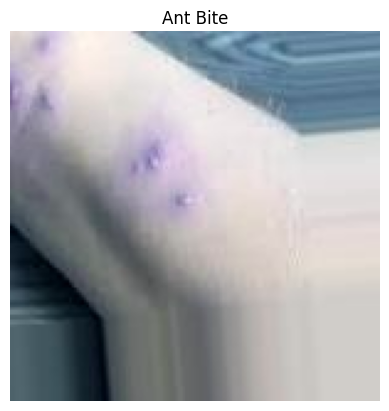

In [4]:
plt.title('Ant Bite'); plt.axis('off'); plt.imshow(cv2.imread('/content/dataset/training/ants/augmented_100_0.jpg'))

**Data Visualizations**

Grayscale intensity with histogram

In [5]:


def grayscale_frequency_histogram(image_path):

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not open or read the image.")
        return
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    plt.figure()
    plt.title("Grayscale Frequency Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.xlim(0, 255)
    plt.plot(histogram)
    plt.show()

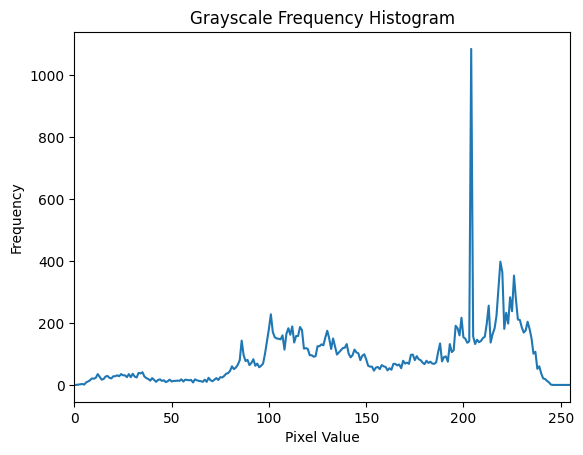

In [6]:
# ants
image_path = '/content/dataset/training/ants/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

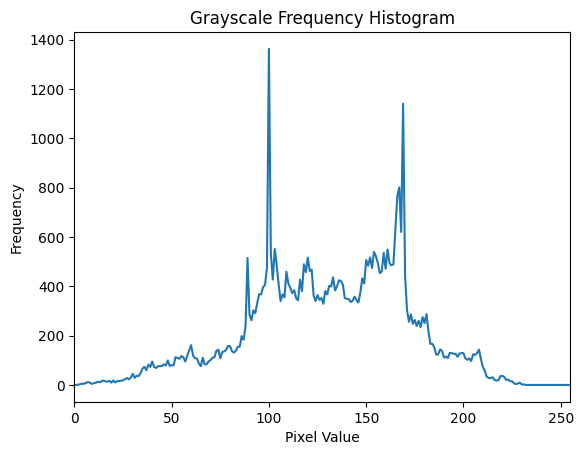

In [7]:
# bed bugs
image_path = '/content/dataset/training/bed_bugs/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

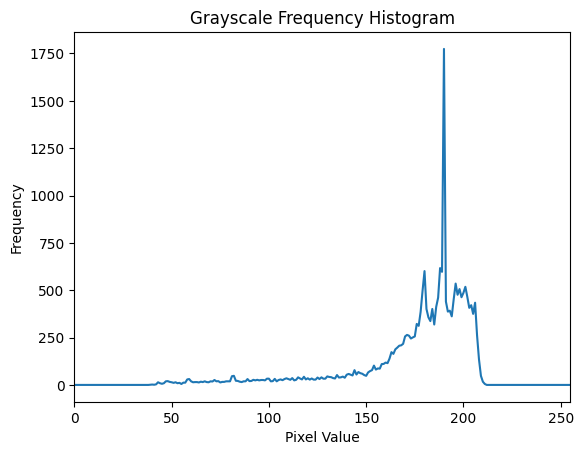

In [8]:
# chiggers
image_path = '/content/dataset/training/chiggers/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

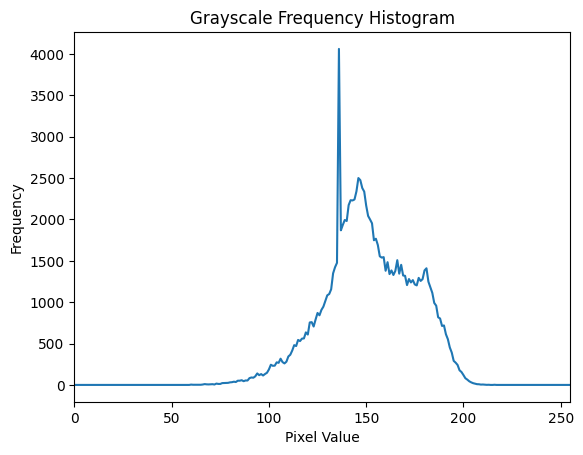

In [9]:
# fleas
image_path = '/content/dataset/training/fleas/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

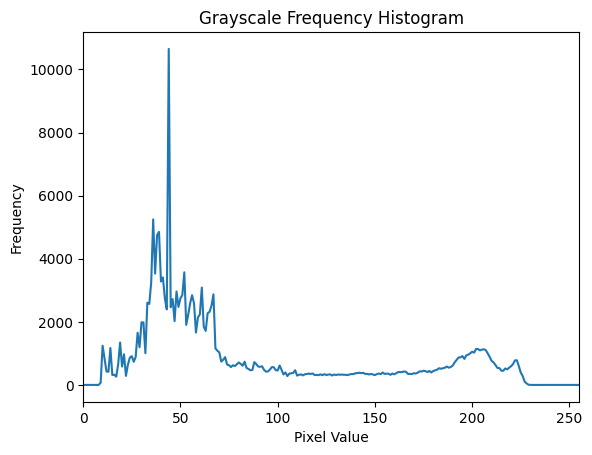

In [10]:
# mosquitos
image_path = '/content/dataset/training/mosquitos/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

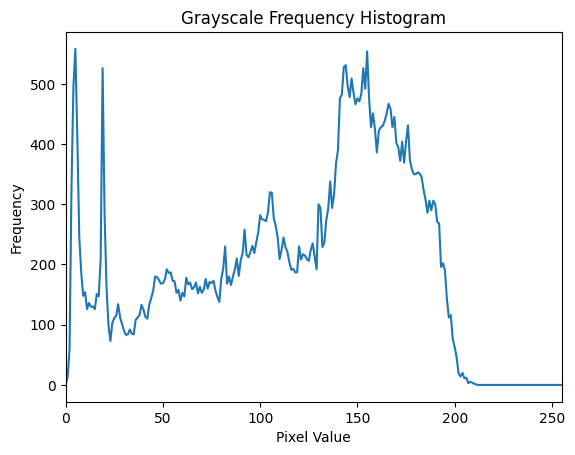

In [11]:
# no bites
image_path = '/content/dataset/training/no_bites/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

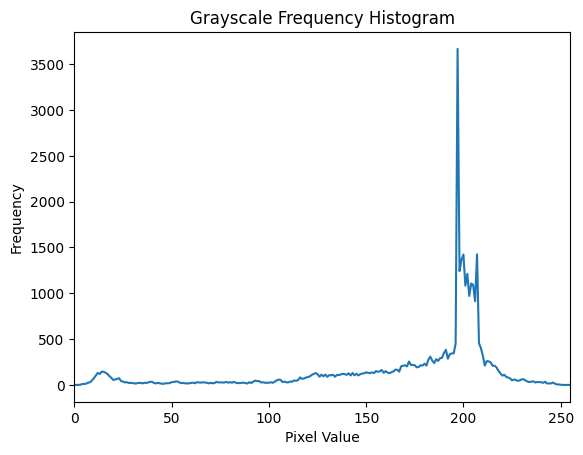

In [12]:
# spiders
image_path = '/content/dataset/training/spiders/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

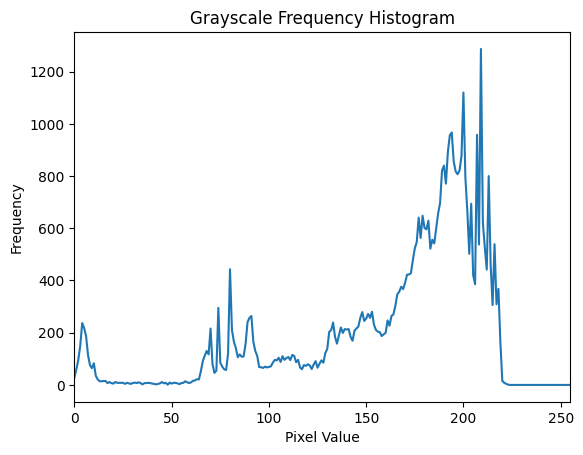

In [13]:
# ticks
image_path = '/content/dataset/training/ticks/augmented_100_0.jpg'
grayscale_frequency_histogram(image_path)

**Model training and deployment**

In [14]:
from tensorflow import keras
from keras import layers
from keras.applications import ResNet50,ResNet101,InceptionV3, Xception
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import plotly
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import cv2

In [15]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer,GlobalAveragePooling2D, Concatenate, Input
from keras.models import Sequential, Model

In [16]:
testGen = ImageDataGenerator()
trainGen = ImageDataGenerator(validation_split=0.15,vertical_flip=True,horizontal_flip=True,rotation_range=0.2)
trainGenerator = trainGen.flow_from_directory("/content/dataset/training",subset="training",target_size=(224,224))
validationGenerator = trainGen.flow_from_directory("/content/dataset/validation",target_size=(224,224),shuffle=False)
testGenerator = testGen.flow_from_directory( "/content/dataset/validation",target_size=(224,224),shuffle=False)

Found 3315 images belonging to 8 classes.
Found 220 images belonging to 8 classes.
Found 220 images belonging to 8 classes.


VGG19

In [17]:
from keras.applications.vgg19 import VGG19
vgg19_model = VGG19(weights="imagenet",include_top = False)
for layer in vgg19_model.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 3s 0us/step


In [18]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [19]:
model1_vgg = Sequential()
model1_vgg.add(layers.Input(shape=(224,224,3)))
model1_vgg.add(layers.Lambda(keras.applications.vgg19.preprocess_input))
model1_vgg.add(vgg19_model)
model1_vgg.add(layers.GlobalAveragePooling2D())
model1_vgg.add(Dense(256, activation='relu'))
model1_vgg.add(Dropout(0.3))
model1_vgg.add(Dense(64, activation='relu'))
model1_vgg.add(Dropout(0.3))
model1_vgg.add(Dense(8, activation='softmax'))
model1_vgg.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                        

In [20]:
model1_vgg.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_vgg.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-20-77dee91463c3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1_vgg.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
104/104 [==============================] - 68s 542ms/step - loss: 2.1823 - accuracy: 0.2160 - val_loss: 1.6391 - val_accuracy: 0.4000
Epoch 2/5
104/104 [==============================] - 47s 452ms/step - loss: 1.6531 - accuracy: 0.3783 - val_loss: 1.4379 - val_accuracy: 0.4773
Epoch 3/5
104/104 [==============================] - 45s 433ms/step - loss: 1.4337 - accuracy: 0.4558 - val_loss: 1.3739 - val_accuracy: 0.5182
Epoch 4/5
104/104 [==============================] - 44s 422ms/step - loss: 1.2829 - accuracy: 0.5225 - val_loss: 1.3300 - val_accuracy: 0.5500
Epoch 5/5
104/104 [==============================] - 46s 440ms/step - loss: 1.1694 - accuracy: 0.5680 - val_loss: 1.3120 - val_accuracy: 0.5182


In [21]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_vgg.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

7/7 [==============================] - 1s 152ms/step
0.5454545454545454


In [22]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.75      0.64        28
           1       0.66      0.69      0.68        36
           2       0.74      0.41      0.53        34
           3       0.60      0.57      0.59        21
           4       0.17      0.40      0.24        10
           5       0.54      0.68      0.60        31
           6       0.50      0.32      0.39        28
           7       0.56      0.44      0.49        32

    accuracy                           0.55       220
   macro avg       0.54      0.53      0.52       220
weighted avg       0.58      0.55      0.55       220



**RESNET50**

In [23]:
resnet_model = ResNet50(include_top=False,weights="imagenet")
for layer in resnet_model.layers[:140]:
    layer.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [24]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential

In [26]:
model1_resnet50 = Sequential()
model1_resnet50.add(layers.Input(shape=(224,224,3)))
model1_resnet50.add(layers.Lambda(keras.applications.resnet50.preprocess_input))
model1_resnet50.add(resnet_model)
model1_resnet50.add(layers.GlobalAveragePooling2D())
model1_resnet50.add(Dense(256, activation='relu'))
model1_resnet50.add(Dropout(0.3))
model1_resnet50.add(Dense(64, activation='relu'))
model1_resnet50.add(Dropout(0.3))
model1_resnet50.add(Dense(8, activation='softmax'))
model1_resnet50.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1_resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [27]:
model1_resnet50.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_resnet50.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-27-12162b739ff3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1_resnet50.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
104/104 [==============================] - 62s 471ms/step - loss: 1.4477 - accuracy: 0.5089 - val_loss: 9.6842 - val_accuracy: 0.3045
Epoch 2/5
104/104 [==============================] - 44s 426ms/step - loss: 0.8768 - accuracy: 0.7110 - val_loss: 1.9928 - val_accuracy: 0.5864
Epoch 3/5
104/104 [==============================] - 45s 432ms/step - loss: 0.6436 - accuracy: 0.7759 - val_loss: 1.5767 - val_accuracy: 0.6909
Epoch 4/5
104/104 [==============================] - 45s 434ms/step - loss: 0.4893 - accuracy: 0.8428 - val_loss: 1.1786 - val_accuracy: 0.7455
Epoch 5/5
104/104 [==============================] - 45s 434ms/step - loss: 0.3812 - accuracy: 0.8793 - val_loss: 1.5926 - val_accuracy: 0.6818


In [28]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_resnet50.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

7/7 [==============================] - 2s 106ms/step
0.7090909090909091


In [29]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.96      0.72        28
           1       0.92      0.67      0.77        36
           2       0.51      0.71      0.59        34
           3       0.70      0.76      0.73        21
           4       0.58      0.70      0.64        10
           5       0.87      0.84      0.85        31
           6       0.88      0.50      0.64        28
           7       0.95      0.56      0.71        32

    accuracy                           0.71       220
   macro avg       0.75      0.71      0.71       220
weighted avg       0.77      0.71      0.71       220



**RESNET50V2**

In [30]:
from keras.applications import ResNet50V2
resnetv2_model = ResNet50V2(include_top=False,weights="imagenet")
for layer in resnetv2_model.layers[:140]:
    layer.trainable = False

94668760/94668760 [==============================] - 4s 0us/step


In [31]:
resnetv2_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, None, None, 64)       0         ['conv1_conv[0][0]']          
                                                                                         

In [32]:
model1_resnet50v2 = Sequential()
model1_resnet50v2.add(layers.Input(shape=(224,224,3)))
model1_resnet50v2.add(layers.Lambda(keras.applications.resnet_v2.preprocess_input))
model1_resnet50v2.add(resnetv2_model)
model1_resnet50v2.add(layers.GlobalAveragePooling2D())
model1_resnet50v2.add(Dense(256, activation='relu'))
model1_resnet50v2.add(Dropout(0.3))
model1_resnet50v2.add(Dense(64, activation='relu'))
model1_resnet50v2.add(Dropout(0.3))
model1_resnet50v2.add(Dense(8, activation='softmax'))
model1_resnet50v2.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1_resnet50v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [33]:
model1_resnet50v2.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_resnet50v2.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-33-aa0b4960949f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1_resnet50v2.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
104/104 [==============================] - 61s 479ms/step - loss: 1.5893 - accuracy: 0.4452 - val_loss: 16.3408 - val_accuracy: 0.2909
Epoch 2/5
104/104 [==============================] - 45s 437ms/step - loss: 1.1649 - accuracy: 0.6208 - val_loss: 1.3056 - val_accuracy: 0.6182
Epoch 3/5
104/104 [==============================] - 44s 427ms/step - loss: 0.8914 - accuracy: 0.7198 - val_loss: 1.2051 - val_accuracy: 0.6773
Epoch 4/5
104/104 [==============================] - 44s 422ms/step - loss: 0.7394 - accuracy: 0.7638 - val_loss: 1.4625 - val_accuracy: 0.5818
Epoch 5/5
104/104 [==============================] - 46s 440ms/step - loss: 0.6418 - accuracy: 0.7934 - val_loss: 1.5926 - val_accuracy: 0.6864


In [34]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_resnet50v2.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

7/7 [==============================] - 1s 89ms/step
0.7136363636363636


In [35]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.66      0.75      0.70        36
           2       0.60      0.74      0.66        34
           3       0.67      0.86      0.75        21
           4       0.86      0.60      0.71        10
           5       0.92      0.74      0.82        31
           6       0.57      0.75      0.65        28
           7       0.90      0.59      0.72        32

    accuracy                           0.71       220
   macro avg       0.76      0.71      0.72       220
weighted avg       0.75      0.71      0.72       220



**MobileNet**

In [36]:
from keras.applications import MobileNet
MobileNet_model = MobileNet(include_top=False,weights="imagenet")
for layer in MobileNet_model.layers[:140]:
    layer.trainable = False

17225924/17225924 [==============================] - 1s 0us/step


In [37]:
MobileNet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 

In [38]:
model1_mobilenet = Sequential()
model1_mobilenet.add(layers.Input(shape=(224,224,3)))
model1_mobilenet.add(layers.Lambda(keras.applications.mobilenet.preprocess_input))
model1_mobilenet.add(MobileNet_model)
model1_mobilenet.add(layers.GlobalAveragePooling2D())
model1_mobilenet.add(Dense(256, activation='relu'))
model1_mobilenet.add(Dropout(0.3))
model1_mobilenet.add(Dense(64, activation='relu'))
model1_mobilenet.add(Dropout(0.3))
model1_mobilenet.add(Dense(8, activation='softmax'))
model1_mobilenet.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1_mobilenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functi  (None, None, None, 1024   3228864   
 onal)                       )                                   
                                                                 
 global_average_pooling2d_3  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 256)               262400    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [39]:
model1_mobilenet.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_mobilenet.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-39-41d29d2d8f52>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1_mobilenet.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
104/104 [==============================] - 46s 400ms/step - loss: 1.8684 - accuracy: 0.2839 - val_loss: 1.3469 - val_accuracy: 0.5318
Epoch 2/5
104/104 [==============================] - 40s 384ms/step - loss: 1.4095 - accuracy: 0.4778 - val_loss: 1.1205 - val_accuracy: 0.6545
Epoch 3/5
104/104 [==============================] - 40s 389ms/step - loss: 1.2126 - accuracy: 0.5617 - val_loss: 1.0985 - val_accuracy: 0.6318
Epoch 4/5
104/104 [==============================] - 42s 403ms/step - loss: 1.0827 - accuracy: 0.6115 - val_loss: 0.9967 - val_accuracy: 0.6409
Epoch 5/5
104/104 [==============================] - 40s 382ms/step - loss: 0.9442 - accuracy: 0.6615 - val_loss: 1.0923 - val_accuracy: 0.6409


In [40]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_mobilenet.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

7/7 [==============================] - 1s 89ms/step
0.6363636363636364


In [41]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.60      0.69      0.64        36
           2       0.55      0.50      0.52        34
           3       0.79      0.71      0.75        21
           4       0.58      0.70      0.64        10
           5       0.60      0.87      0.71        31
           6       0.55      0.39      0.46        28
           7       0.79      0.59      0.68        32

    accuracy                           0.64       220
   macro avg       0.65      0.64      0.64       220
weighted avg       0.64      0.64      0.63       220



**InveptionV3**

In [42]:
from keras.applications import InceptionV3
Inception_model = InceptionV3(include_top=False,weights="imagenet")
for layer in Inception_model.layers[:140]:
    layer.trainable = False

87910968/87910968 [==============================] - 4s 0us/step


In [43]:
Inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_9[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalizati

In [44]:
model1_inception = Sequential()
model1_inception.add(layers.Input(shape=(224,224,3)))
model1_inception.add(layers.Lambda(keras.applications.inception_v3.preprocess_input))
model1_inception.add(Inception_model)
model1_inception.add(layers.GlobalAveragePooling2D())
model1_inception.add(Dense(256, activation='relu'))
model1_inception.add(Dropout(0.3))
model1_inception.add(Dense(64, activation='relu'))
model1_inception.add(Dropout(0.3))
model1_inception.add(Dense(8, activation='softmax'))
model1_inception.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1_inception.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_12 (Dense)            (None, 256)               524544    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 64)               

In [45]:
model1_inception.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_inception.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-45-4807f4a73e0d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1_inception.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
104/104 [==============================] - 76s 496ms/step - loss: 1.6764 - accuracy: 0.3855 - val_loss: 2.3271 - val_accuracy: 0.3636
Epoch 2/5
104/104 [==============================] - 46s 442ms/step - loss: 1.0701 - accuracy: 0.6380 - val_loss: 2.4874 - val_accuracy: 0.5182
Epoch 3/5
104/104 [==============================] - 43s 417ms/step - loss: 0.8572 - accuracy: 0.7267 - val_loss: 1.4785 - val_accuracy: 0.6864
Epoch 4/5
104/104 [==============================] - 43s 418ms/step - loss: 0.6728 - accuracy: 0.7801 - val_loss: 1.3170 - val_accuracy: 0.6591
Epoch 5/5
104/104 [==============================] - 45s 431ms/step - loss: 0.5861 - accuracy: 0.8087 - val_loss: 1.5238 - val_accuracy: 0.6364


In [46]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_inception.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

7/7 [==============================] - 2s 80ms/step
0.6590909090909091


In [47]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.86      0.62        28
           1       0.74      0.64      0.69        36
           2       0.47      0.74      0.57        34
           3       0.85      0.81      0.83        21
           4       0.50      0.40      0.44        10
           5       0.96      0.71      0.81        31
           6       0.75      0.32      0.45        28
           7       0.88      0.66      0.75        32

    accuracy                           0.66       220
   macro avg       0.70      0.64      0.65       220
weighted avg       0.72      0.66      0.66       220



DenseNet121

In [48]:
from keras.applications import DenseNet121
Dense_model = DenseNet121(include_top=False,weights="imagenet")
for layer in Dense_model.layers[:140]:
    layer.trainable = False

29084464/29084464 [==============================] - 2s 0us/step


In [49]:
Dense_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['input_11[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']

In [50]:
model1_dense = Sequential()
model1_dense.add(layers.Input(shape=(224,224,3)))
model1_dense.add(layers.Lambda(keras.applications.densenet.preprocess_input))
model1_dense.add(Dense_model)
model1_dense.add(layers.GlobalAveragePooling2D())
model1_dense.add(Dense(256, activation='relu'))
model1_dense.add(Dropout(0.3))
model1_dense.add(Dense(64, activation='relu'))
model1_dense.add(Dropout(0.3))
model1_dense.add(Dense(8, activation='softmax'))
model1_dense.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1_dense.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 densenet121 (Functional)    (None, None, None, 1024   7037504   
                             )                                   
                                                                 
 global_average_pooling2d_5  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_15 (Dense)            (None, 256)               262400    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 64)               

In [51]:
model1_dense.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_dense.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-51-0a709a421890>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1_dense.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
104/104 [==============================] - 108s 574ms/step - loss: 1.5432 - accuracy: 0.4462 - val_loss: 3.8594 - val_accuracy: 0.2955
Epoch 2/5
104/104 [==============================] - 45s 433ms/step - loss: 0.9832 - accuracy: 0.6627 - val_loss: 1.8528 - val_accuracy: 0.5955
Epoch 3/5
104/104 [==============================] - 48s 457ms/step - loss: 0.8289 - accuracy: 0.7231 - val_loss: 2.3815 - val_accuracy: 0.5182
Epoch 4/5
104/104 [==============================] - 45s 433ms/step - loss: 0.7061 - accuracy: 0.7704 - val_loss: 1.4878 - val_accuracy: 0.6318
Epoch 5/5
104/104 [==============================] - 47s 448ms/step - loss: 0.5166 - accuracy: 0.8265 - val_loss: 1.6439 - val_accuracy: 0.7136


In [52]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_dense.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

7/7 [==============================] - 2s 96ms/step
0.6727272727272727


In [53]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        28
           1       0.86      0.53      0.66        36
           2       0.39      0.71      0.51        34
           3       0.53      0.90      0.67        21
           4       1.00      0.60      0.75        10
           5       0.89      1.00      0.94        31
           6       0.73      0.39      0.51        28
           7       0.82      0.72      0.77        32

    accuracy                           0.67       220
   macro avg       0.76      0.67      0.68       220
weighted avg       0.75      0.67      0.68       220



EfficientNet

In [54]:
from keras.applications import EfficientNetB0
efficient_model = EfficientNetB0(include_top=False,weights="imagenet")
for layer in efficient_model.layers[:140]:
    layer.trainable = False

16705208/16705208 [==============================] - 1s 0us/step


In [55]:
efficient_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_13[0][0]']            
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [56]:
model1_efficient = Sequential()
model1_efficient.add(layers.Input(shape=(224,224,3)))
model1_efficient.add(layers.Lambda(keras.applications.efficientnet.preprocess_input))
model1_efficient.add(efficient_model)
model1_efficient.add(layers.GlobalAveragePooling2D())
model1_efficient.add(Dense(256, activation='relu'))
model1_efficient.add(Dropout(0.3))
model1_efficient.add(Dense(64, activation='relu'))
model1_efficient.add(Dropout(0.3))
model1_efficient.add(Dense(8, activation='softmax'))
model1_efficient.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1_efficient.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_6 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_18 (Dense)            (None, 256)               327936    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 64)               

In [58]:
model1_efficient.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model1_efficient.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-58-0f6a7e431b2f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1_efficient.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
104/104 [==============================] - 78s 437ms/step - loss: 1.2453 - accuracy: 0.5563 - val_loss: 1.2746 - val_accuracy: 0.6273
Epoch 2/5
104/104 [==============================] - 42s 401ms/step - loss: 0.6950 - accuracy: 0.7707 - val_loss: 0.9986 - val_accuracy: 0.7227
Epoch 3/5
104/104 [==============================] - 45s 430ms/step - loss: 0.4911 - accuracy: 0.8377 - val_loss: 1.4088 - val_accuracy: 0.6364
Epoch 4/5
104/104 [==============================] - 43s 413ms/step - loss: 0.3687 - accuracy: 0.8851 - val_loss: 1.2470 - val_accuracy: 0.6909
Epoch 5/5
104/104 [==============================] - 44s 418ms/step - loss: 0.3304 - accuracy: 0.8980 - val_loss: 1.1884 - val_accuracy: 0.7182


In [59]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1_efficient.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

7/7 [==============================] - 3s 95ms/step
0.7181818181818181


In [60]:
# Display classification report
print('Classification Report:')
print(classification_report(testGenerator.labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.79      0.72      0.75        36
           2       0.53      0.53      0.53        34
           3       0.67      0.86      0.75        21
           4       0.78      0.70      0.74        10
           5       0.87      0.65      0.74        31
           6       0.83      0.54      0.65        28
           7       0.62      0.91      0.73        32

    accuracy                           0.72       220
   macro avg       0.74      0.72      0.72       220
weighted avg       0.74      0.72      0.72       220



Stacked Model

In [65]:
from keras.applications import ConvNeXtBase
input_shape = (224,224, 3)

mobilenet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
efficientnet_base = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in mobilenet_base.layers:
    layer.trainable = False

for layer in efficientnet_base.layers:
    layer.trainable = False

for layer in resnet_base.layers:
    layer.trainable = False


input_tensor = Input(shape=input_shape)

mobilenet_output = mobilenet_base(input_tensor)
efficientnet_output = efficientnet_base(input_tensor)
resnet_output = resnet_base(input_tensor)

# Concatenate the outputs of all models
concatenated_output = Concatenate()([GlobalAveragePooling2D()(mobilenet_output),
                                     GlobalAveragePooling2D()(efficientnet_output),
                                     GlobalAveragePooling2D()(resnet_output),
                                     ])

stacked_model= Dense(256, activation='relu')(concatenated_output)
stacked_model = tf.keras.layers.Dropout(0.3)(stacked_model)
stacked_model = Dense(64, activation='relu')(stacked_model)
stacked_model = tf.keras.layers.Dropout(0.3)(stacked_model)
stacked_model = Dense(8, activation='softmax')(stacked_model)

stacked_model_final = Model(inputs=input_tensor, outputs=[stacked_model])
stacked_model_final.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
stacked_model_final.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 efficientnetb0 (Functional  (None, 7, 7, 1280)           4049571   ['input_22[0][0]']            
 )                                                                                                
                                                                                                  
 convnext_base (Functional)  (None, 7, 7, 1024)           8756646   ['input_22[0][0]']            
                                                          4                                       
                                                                                            

In [66]:
stacked_model_final.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = stacked_model_final.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-66-9dacc48ec03c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = stacked_model_final.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
104/104 [==============================] - 122s 879ms/step - loss: 1.6059 - accuracy: 0.3994 - val_loss: 1.0331 - val_accuracy: 0.6773
Epoch 2/5
104/104 [==============================] - 76s 725ms/step - loss: 1.0794 - accuracy: 0.6087 - val_loss: 0.8729 - val_accuracy: 0.7091
Epoch 3/5
104/104 [==============================] - 81s 772ms/step - loss: 0.8145 - accuracy: 0.7080 - val_loss: 0.7824 - val_accuracy: 0.7455
Epoch 4/5
104/104 [==============================] - 76s 724ms/step - loss: 0.6831 - accuracy: 0.7448 - val_loss: 0.7381 - val_accuracy: 0.7409
Epoch 5/5
104/104 [==============================] - 75s 722ms/step - loss: 0.5657 - accuracy: 0.7967 - val_loss: 0.7682 - val_accuracy: 0.7545


In [68]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(stacked_model_final.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

7/7 [==============================] - 11s 687ms/step
0.75
